In [ ]:
# Necesarry Imports - These may take a few minutes to install
if(! require("tidyverse")){install.packages("tidyverse")}
if(!require("ISLR")) {install.packages("ISLR")}
if(!require("caret")) {install.packages("caret")}
if(!require("e1071")) {install.packages("e1071")}
if(!require("MASS")) {install.packages("MASS")}
if(!require("DataExplorer")) {install.packages("DataExplorer")}
if(!require("RANN")) {install.packages("RANN")}
if(!require("maps")) {install.packages("maps")}
if(!require("randomForest")) {install.packages("randomForest")}
if(! require("leaps") ){ install.packages("leaps") }
if(! require("glmnet") ){ install.packages("glmnet") }
if(! require("pls") ){ install.packages("pls") }
if(!require("rpart")) {install.packages("rpart")}
if(!require("rpart.plot")) {install.packages("rpart.plot")}
if(!require("corrplot")) {install.packages("corrplot")}

In [ ]:
# Call all of the libraries 
library(tidyverse)
library(ISLR)
library(caret)
library(e1071)
library(MASS)
library(randomForest)
#library(gbm)
library(DataExplorer)
library(RANN)
library(maps)
library(leaps)
library(glmnet)
library(pls)
library(rpart)
library(rpart.plot)
library(corrplot)

# **Data Loading**

For this project we will be utilisng the data from US Universities in 1995. The datasets used will be two : aaup.csv and us_new.csv 

<p>Aaup.csv - Contains data on professor and assistant professor salary.</p>

<p>US_new.csv - Contains data on universities acceptance rates, SAT scores, Tuition charges and more pertaining to individual universities. </p>

<p>Both datasets reference the same universities and as such we will merge them to obtain a more wholistic one.</p>

In [ ]:
# Load AAUP Data -  Contains professor data
prof_data <- read.csv("aaup.csv",header= FALSE)

In [ ]:
# Load Us News College Data 
college_data <- read.csv("us_news.csv",header=FALSE)

One common thing we notice about the data is the fact that the headers are missing. Details on the actual headers of the columns are contained in the metadata file and we will have to manually input these details.

In [ ]:
# Specified the column names of the aaup
aaup_columns <- c("FICE (Federal ID number)","College name",
"State (postal code)","Type  (I, IIA, or IIB)",
"Average salary - full professors",
"Average salary - associate professors",
"Average salary - assistant professors",
"Average salary - all ranks",
"Average compensation - full professors",
"Average compensation - associate professors",
"Average compensation - assistant professors",
"Average compensation - all ranks","Number of full professors",
"Number of associate professors","Number of assistant professors",
"Number of instructors","Number of faculty - all ranks")
# Assign the column names to the dataset 
colnames(prof_data) <- aaup_columns

In [ ]:
# Specified the column names of the college dataset 
college_columns <- c("FICE (Federal ID number)","College name",
"State (postal code)","Public/private indicator (public=1, private=2)",
"Average Math SAT score","Average Verbal SAT score",
"Average Combined SAT score",
"Average ACT score","First quartile - Math SAT","Third quartile - Math SAT",
"First quartile - Verbal SAT","Third quartile - Verbal SAT",
"First quartile - ACT","Third quartile - ACT",
"Number of applications received",
"Number of applicants accepted","Number of new students enrolled"
,"Pct. new students from top 10% of H.S. class",
"Pct. new students from top 25% of H.S. class",
"Number of fulltime undergraduates",
"Number of parttime undergraduates","In-state tuition","Out-of-state tuition",
"Room and board costs","Room costs","Board costs","Additional fees",
"Estimated book costs",
"Estimated personal spending","Pct. of faculty with Ph.D.'s",
"Pct. of faculty with terminal degree","Student/faculty ratio",
"Pct.alumni who donate","Instructional expenditure per student",
"Graduation rate")
# Assign the column names to the dataset 
colnames(college_data) <- college_columns

In [ ]:
sprintf('The dimesnsions of the professor salary data is : %s rows and %s columns',dim(prof_data)[1],dim(prof_data)[2])
sprintf('The dimesnsions of the college data is : %s rows and %s columns',dim(college_data)[1],dim(college_data)[2])

[1] "The dimesnsions of the professor salary data is : 1161 rows and 17 columns"

[1] "The dimesnsions of the college data is : 1302 rows and 35 columns"

Based on the column names it is clear that we have columns that have been repeated as a result of the merge. We will need to remove one of the columns. 

Using an inner join resulted in a reduction of our dataset by about 100 rows however we have obtained higher granularity among the remaining rows.

In [ ]:
uni_data <- inner_join(prof_data,college_data,by=c("FICE (Federal ID number)"))

In [ ]:
sprintf('The dimesnsions of the merged data are : %s rows and %s columns',dim(uni_data)[1],dim(uni_data)[2])

[1] "The dimesnsions of the merged data are : 1134 rows and 51 columns"

In [ ]:
uni_data$`College name.y` <- NULL
uni_data$`State (postal code).y` <- NULL
uni_merged <- uni_data

In [ ]:
sprintf('Updated dimesnsions of the merged data with no duplicate columns is : %s rows and %s columns',dim(uni_merged)[1],dim(uni_merged)[2])

[1] "Updated dimesnsions of the merged data with no duplicate columns is : 1134 rows and 49 columns"

# **Data Type Conversion**
<p>As noted earlier majoriity of the data that we have meant to be numerical with the exclusion of the College Name, The State the College is located in and the Short hand of the college location.</p>

<p>These variables are at present Character types and thus need to be converted to numerical as either a double/float. One of the main reasons we are making the conversion is to allow us to easily deal with the missing values.</p>

In [ ]:
uni_merged[,5:49] <- sapply(uni_merged[,5:49],as.numeric)

Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“N

# **Missing Values**

From the onset it was easy for us to notice that our data had certain columns that had extensive numbers of missing values. The missing values will have an impact on any analysis and modelling we do. Moreover their presence may lead us to making conclusions that may otherwise not be true about the entire population. 

We addressed the missing values through the following steps: 
*   If there are missing values for the categorical values we substitute them with the mode of the variable 
*   Continuous variables with high numbers of missing values will be removed from the dataframe 
*   Continuous variables that have a small number of missing values will be imputed uding the mean of their nearest neighbours. (Implemented using KNN)



We implemented the plot below to give an idea of the distribtution of missing values across the dataset.

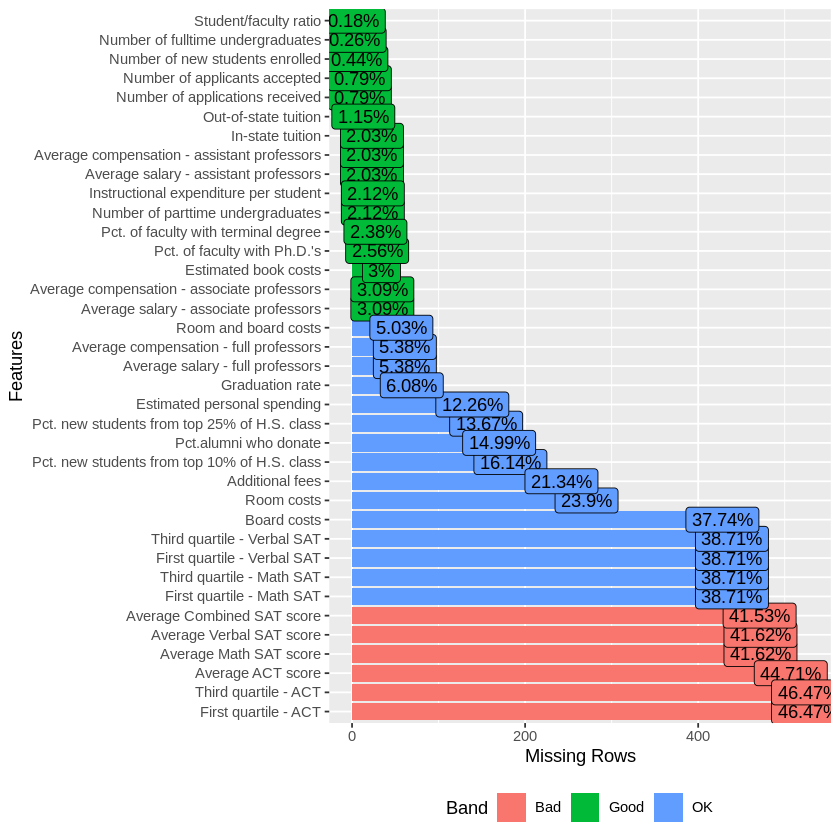

In [ ]:
plot_missing(uni_merged[,5:49], missing_only = TRUE)

<p>Our legend identifies values with greater than 35% of the values as missing to be too high. These are the variables that we will remove while we impute the rest.The removed variables include:</p> Average Math SAT score, Average Verbal SAT score, Average Combined SAT score, Average ACT score, First quartile - Math SAT, Third quartile - Math SAT, First quartile - Verbal SAT, Third quartile - Verbal SAT, First quartile - ACT, Third quartile - ACT.

<p>We also note that none of the categorical variables in the dataset have any values hence our focus will be on our continous variables.</p>

In [ ]:
# Removing the variables with too many missing variables 
uni_merged$`Average ACT score` <- NULL
uni_merged$`Average Combined SAT score` <- NULL
uni_merged$`Average Math SAT score` <- NULL
uni_merged$`Average Verbal SAT score` <- NULL
uni_merged$`First quartile - ACT` <- NULL
uni_merged$`First quartile - Math SAT` <- NULL
uni_merged$`First quartile - Verbal SAT` <- NULL
uni_merged$`Third quartile - ACT` <- NULL
uni_merged$`Third quartile - Math SAT` <- NULL
uni_merged$`Third quartile - Verbal SAT` <- NULL

In [ ]:
sprintf('Updated dimensions after variables were dropped: %s rows and %s columns',dim(uni_merged)[1],dim(uni_merged)[2])

[1] "Updated dimensions after variables were dropped: 1134 rows and 39 columns"

### **KNN For Imputation**

In [ ]:
# Specification of columns to be considered when doing an imputation 
impute_values <- preProcess(uni_merged %>% 
                          dplyr::select("Number of applications received",
                              "Number of applicants accepted","Number of new students enrolled",  
                              "Pct. new students from top 10% of H.S. class",
                              "Pct. new students from top 25% of H.S. class",
                              "Number of fulltime undergraduates",
                              "Number of parttime undergraduates","In-state tuition","Out-of-state tuition",
                              "Room and board costs","Room costs","Board costs","Additional fees",
                              "Estimated book costs",
                              "Estimated personal spending","Pct. of faculty with Ph.D.'s",
                              "Pct. of faculty with terminal degree","Student/faculty ratio",
                              "Pct.alumni who donate","Instructional expenditure per student",
                              "Graduation rate","Average salary - full professors",
                              "Average salary - associate professors",
                              "Average salary - assistant professors",
                              "Average salary - all ranks",
                              "Average compensation - full professors",
                              "Average compensation - associate professors",
                              "Average compensation - assistant professors",
                              "Average compensation - all ranks","Number of full professors",
                              "Number of associate professors","Number of assistant professors",
                              "Number of instructors","Number of faculty - all ranks"),
                            method = c("knnImpute"),
                            k = 10,
                            knnSummary = mean)
# Prediction for specified values that will need to be imputed 
impute_info <- predict(impute_values, uni_merged,na.action = na.pass)

In [ ]:
# Callculate the means and standard deviation(means based on k = 10) of the variables that we want to impute 
imputeNames <- data.frame(col = names(impute_values$mean), mean = impute_values$mean, sd = impute_values$std)

In [ ]:
# Sub in the means to our missing values in our uni dataset 
for(i in imputeNames$col){
 impute_info[i] <- impute_info[i]*impute_values$std[i]+impute_values$mean[i] 
}

In [ ]:
# Reassign the imputation of the values to uni_impute
uni_imputed <- impute_info

In [ ]:
# Confirm no missing values 
any(is.na(uni_imputed)) 

[1] FALSE

Our KNN imputation uses the 10 nearest neighbours for a given variable to determine the mean and assigns that value to the missing rows of the variable. 

Comparing the summaries of the initial dataset we do not notice any major fluctuations in the mean that may be a cause for concern.
As noted earlier on we do not have any missing categorical variables hence this was not a concern. 

We can compare the mean of the unimputed variables to the new variables.

In [ ]:
# uni_numerical - Represents all the numerical variables in the dataset 
uni_numerical <- uni_imputed[,5:39]

In [ ]:
mean_generator <- function(dataframe){
   "
   ------------------------------------------------------------ 
   Aim:
   Function that computes the mean of all columns in a dataframe 
   for comparison purposes 
   ------------------------------------------------------------ 
   Parameters : 
   dataframe - R dataframe 
   -------------------------------------------------------------
   Returns:
   mean_calc - list of the mean of the columns in the  dataframe (list)
   -------------------------------------------------------------
  "
    mean_calc <- list()
    for (i in names(dataframe)){
        newelem <- c(median(dataframe[, i],na.rm=TRUE))
        mean_calc <- c(mean_calc , newelem)
     }
     return(mean_calc)
  }
# Imputed_mean - Mean of the numerical variables in the dataset 
imputed_mean <- mean_generator(uni_numerical)
# Col_names - Contains the column names of the Numerical variables 
col_names <- colnames(uni_numerical)
#  Original_mean - Mean of the numerical variables in the original dataset 
original_mean <- mean_generator(uni_merged[,5:39])
# Dataframe containig  the original and imputed means of the variables
mean_df <- do.call(rbind, Map(data.frame, Col_Name=col_names, Imputed_Mean=imputed_mean, Original_Mean=original_mean))

In [ ]:
# Mean_complete - Dataframe that contains the mutatated absolute difference between the Original and Merged
mean_complete <- mean_df %>% mutate(diff = abs(mean_df$Imputed_Mean - mean_df$Original_Mean))

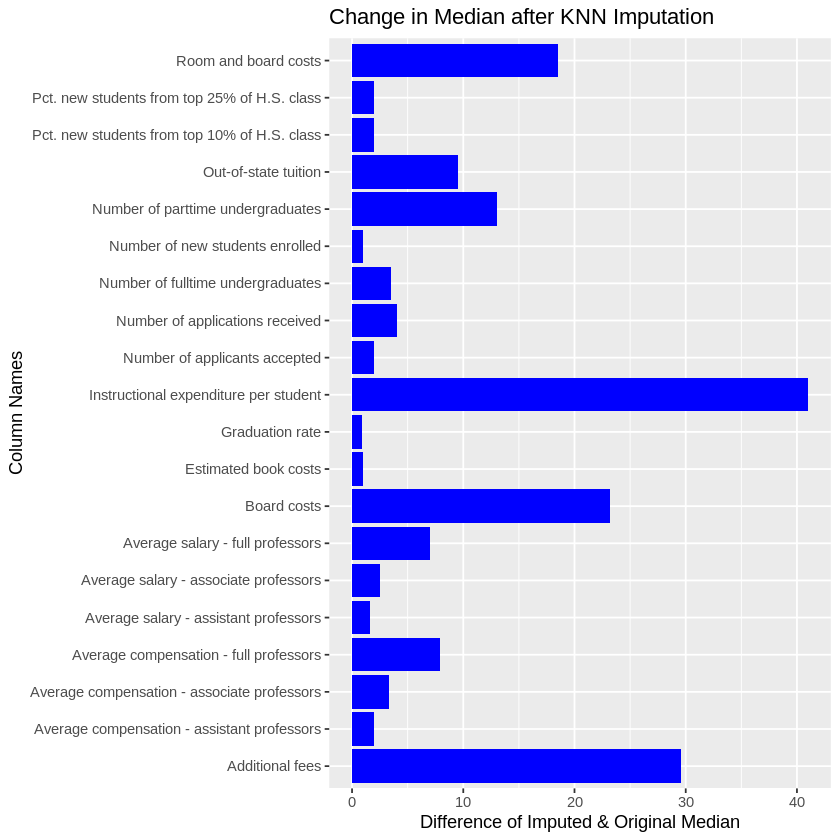

In [ ]:
# Plot of change in Mean 
ggplot(filter(mean_complete, mean_complete$diff > 0 & mean_complete$diff < 50), aes(y=diff, x=Col_Name)) + 
    geom_bar(position="dodge", stat="identity",fill = "blue") + coord_flip() + 
    labs(x="Column Names", y = "Difference of Imputed & Original Median") + 
    ggtitle("Change in Median after KNN Imputation")


As we noted earlier on, the imputation of the missing values was succesful and this is supported the minor changes we note in the absolute difference of the mean of the original and imputed values.

# **Exploratory Analysis**
Our exploratory analysis will be focused on helping us identify which variables have a relationship with the In-State-Tuition that we are trying to predict. 

It is important for us to identify the relationships that existed between the variables in our dataset. We will focus on doing this by identifying and correlation and collinearity between the variabble.



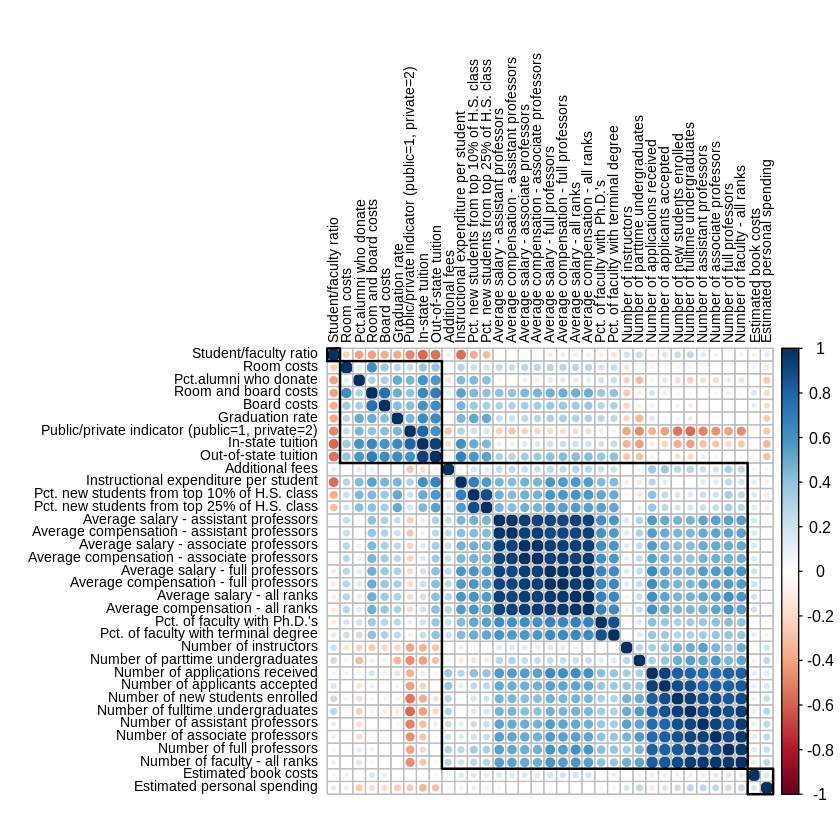

In [ ]:
index = uni_imputed[,5:39]
plotType = cor(index)
corrplot(plotType, tl.col = "black", order = "hclust", hclust.method = "average", addrect = 4, tl.cex = 0.7)

In [ ]:
tuition_cor <- as.data.frame(t(cor(index$`In-state tuition`, index)))
colnames(tuition_cor) <- c("Correlation")
high_cor_tuition <- filter(tuition_cor, (Correlation >= 0.5))
high_cor_tuition

,Correlation
,<dbl>
"Public/private indicator (public=1, private=2)",0.8083687
In-state tuition,1.0000000
Out-of-state tuition,0.9313424
Room and board costs,0.6491681
Board costs,0.5970027
Pct.alumni who donate,0.5989483
Instructional expenditure per student,0.6017420
Graduation rate,0.6257545


To find a strong relationship between our variables we ploted it as a correlation plot and grouped it based ion heirarchical clustering. We found the variables that were the least correlated to our data which are listed below:

* Estimated personal spending 
* Number of Instrustors 
* Number of parttime undergraduates
* Number of student/faculty ratio
* Estimated book costs
* Additional fees 



**In-State-Tuition Rate By State**

We know that there is alot of difference between how various states in America are run hence it may be worth while to see if there are any major differences in the In-State-Tuition that they charge.

In [ ]:
# Mean of the In state tuition for every state 
# states carries the geometric polygon/ shapefile of the data 
states <- map_data("state")
# x -  Contains the lowercase names of the American States 
x <- c(states$region)
# contains the abbreviations of the state names 
val <- state.abb[match(x,tolower(state.name))]
# Assign val to abrv which will be the column in states that holds the abbreviation of the state name 
states$abrv <- val
# tuition_aggregate -  Average/Mean of in-state-tuition for all the universities in a given state
tuition_aggregate<-aggregate(uni_imputed$`In-state tuition`~uni_imputed$`State (postal code).x`,uni_imputed,mean)
# state_tuition contains the geometric location of all states and the average in state tuition for the states 
state_tuition <-merge(states,tuition_aggregate,x.by="abrv")

In [ ]:
freq_data <- as.data.frame(table(unlist(uni_imputed$`State (postal code).x`)))
colnames(freq_data) <- c("abrv","freq")
state_tuition2 <-merge(state_tuition,freq_data,x.by="abrv")

In [ ]:
# Update the column names of State_tuition with simpler column names to make referncing easier 
new_cols <- c("long","lat","group","order","region","subregion","abrv","abrv2","tuition")
colnames(state_tuition) <- new_cols

In [ ]:
# There is potential of variations in tuition which may make visualization hard we will add a new column that contains rescaled tuition values
state_tuition$scaled_tuition <- scales::rescale(state_tuition$tuition)

In [ ]:
colnames(state_tuition2)
new_cols <- c("abrv","long","lat","group","order","region","subregion","abrv2","tuition","freq")
colnames(state_tuition2) <- new_cols

[1] "abrv"                                "long"                               
 [3] "lat"                                 "group"                              
 [5] "order"                               "region"                             
 [7] "subregion"                           "uni_imputed$`State (postal code).x`"
 [9] "uni_imputed$`In-state tuition`"      "freq"

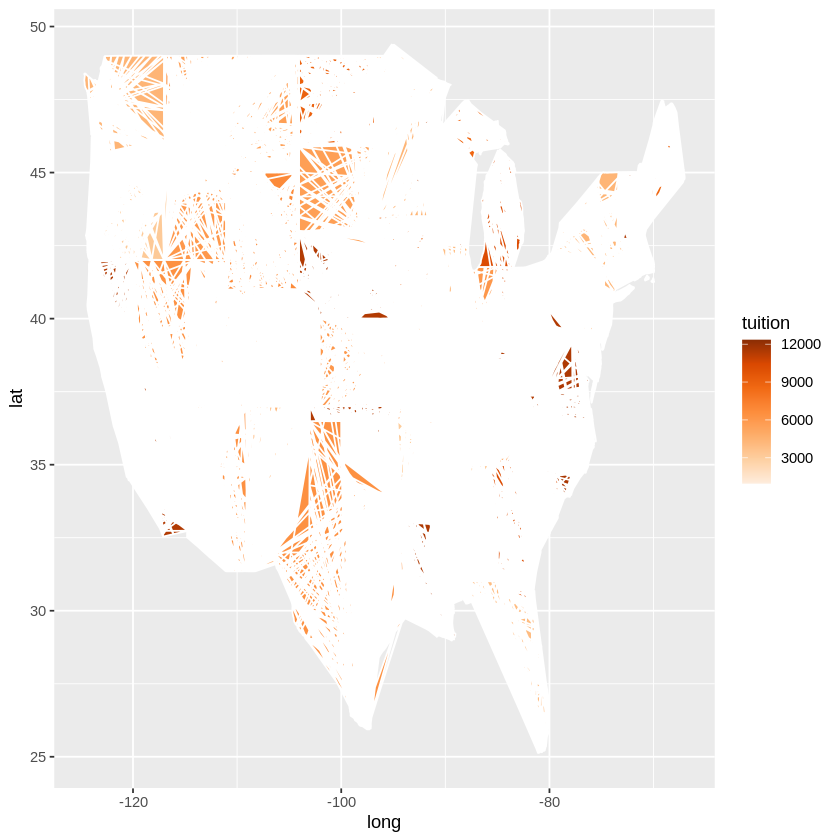

In [ ]:
# Generate map 
ggplot(data = state_tuition2) + 
  geom_polygon(aes(x = long, y = lat, fill=tuition	, group = group), color = "white") +
  scale_fill_distiller(palette = "Oranges", direction = 1) 

Warning message in pal_name(palette, type):
“Unknown palette green”


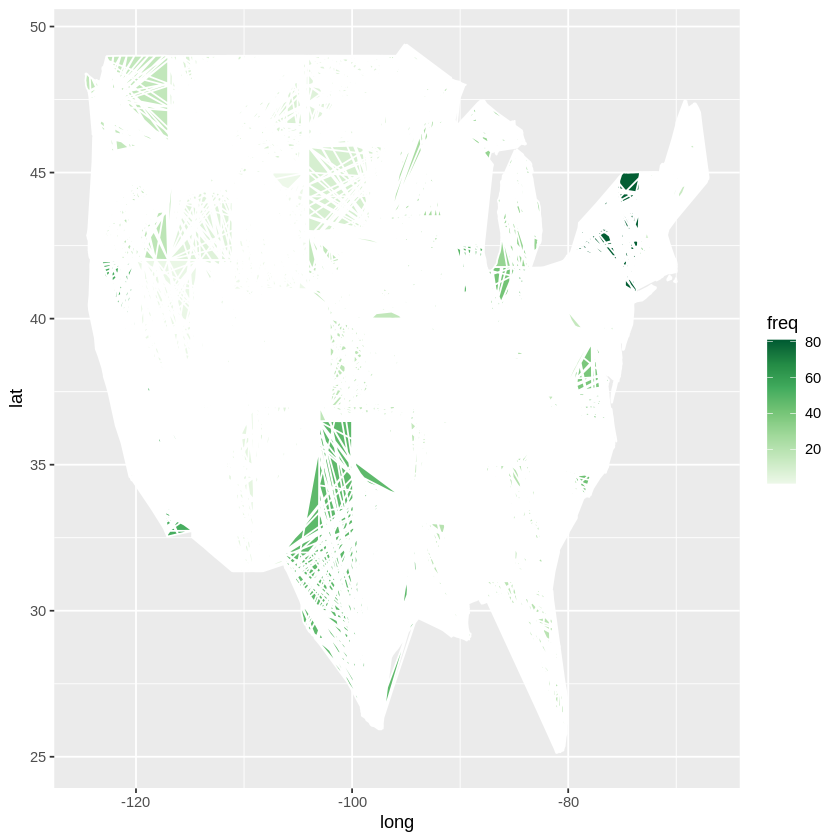

In [ ]:
# Generate map 
ggplot(data = state_tuition2) + 
  geom_polygon(aes(x = long, y = lat, fill=freq, group = group), color = "white") +
  scale_fill_distiller(palette = "green", direction = 1) 

The shade of color on the map above seems to indicate that across the board the tuition rates charged in the various states are not that different. We can thus conclude that location of the university is not a factor that affects the in state tuition.

**Public Vs Private In-State-Tuition Rates**

Generally, private institutions are associated with prestidge and there is a going assumotion that they are able to offer a higher quality of education due to smaller class sizes. It may be worthwhile to see if our data reflects this assumption as well. 


In [ ]:
# The Public/Private column in a categorical variable represented by 1 & 2 
# For the sake of uniformity we will convert this back to 0  for public and 1 for private 
uni_imputed$`Public/private indicator (public=1, private=2)`[uni_imputed$`Public/private indicator (public=1, private=2)`== 1] <- 0
uni_imputed$`Public/private indicator (public=1, private=2)`[uni_imputed$`Public/private indicator (public=1, private=2)`== 2] <- 1

In [ ]:
# size_0 -  Contains the count of public universities 
size_0 = nrow(uni_imputed[uni_imputed$`Public/private indicator (public=1, private=2)`== 0,])
# size_1 - Contains the count of private universities 
size_1 = nrow(uni_imputed[uni_imputed$`Public/private indicator (public=1, private=2)`== 1,])
sizes <- c(size_0,size_1)
vals <- c("Public","Private")
# Status_uni - Dataframe that contains the count of Public and Private
status_uni <- do.call(rbind, Map(data.frame,des=vals ,sizes=sizes))
status_uni

,des,sizes
,<chr>,<int>
Public,Public,440
Private,Private,694


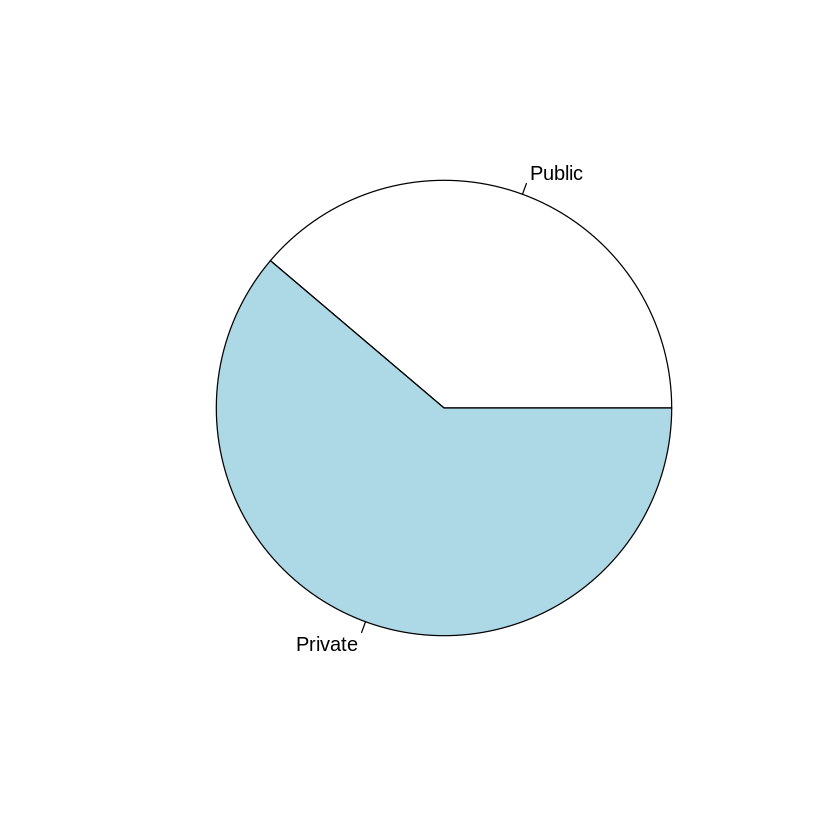

In [ ]:
# Plot the distribution of the public and private universities 
pie(status_uni$sizes,status_uni$des)

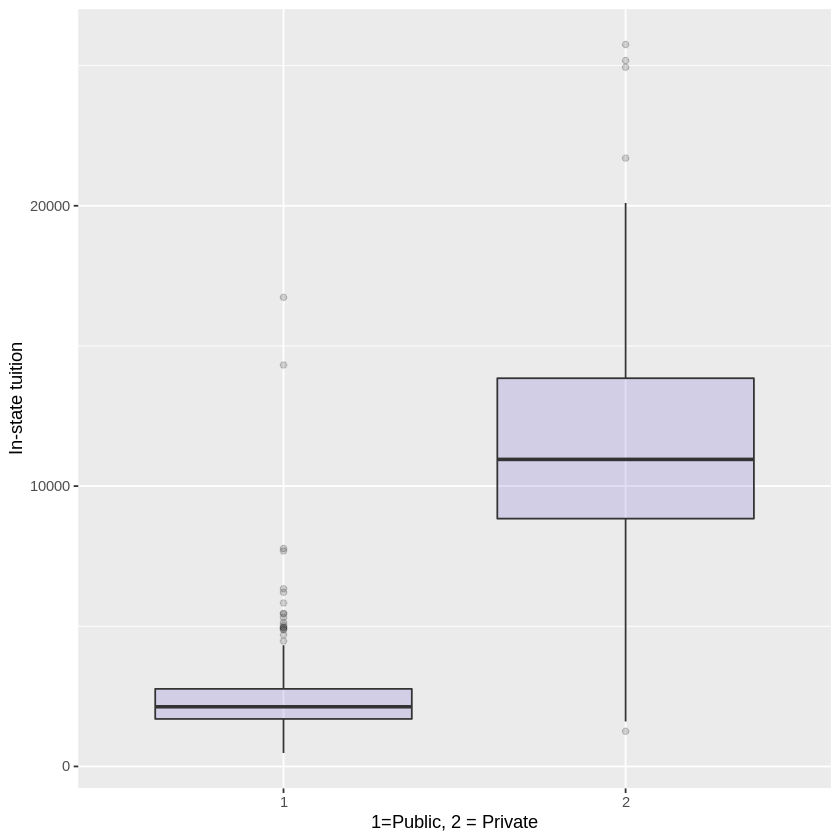

In [ ]:
#   Outliers in the In-State-Tuition 
ggplot(index, aes(x=as.factor(`Public/private indicator (public=1, private=2)`), y=`In-state tuition`)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("1=Public, 2 = Private")

In [ ]:
# Parameters for removing outliers ---> 1.5 * IQR 
index = uni_imputed[,5:39]
index_public <- filter(index, index$`Public/private indicator (public=1, private=2)` == 0)
index_private <- filter(index, index$`Public/private indicator (public=1, private=2)` == 1)
IQR_public <- IQR(index_public$`In-state tuition`)
IQR_private <- IQR(index_private$`In-state tuition`)
#third_quart_public <- quantile(index_public$`In-state tuition`)[3]
#first_quart_public <- quantile(index_public$`In-state tuition`)[1]
#index <- filter(index, (index$`In-state tuition` < (third_quart_private + 1.5 * IQR_private)))
#index <- filter(index, index$`Public/private indicator (public=1, private=2)` == 1 & index$`
#In-state tuition` < 1.5 * IQR_private & index$`In-state tuition` < -1.5 * IQR_private)
index$`Public/private indicator (public=1, private=2)` <- NULL

From the visualization above it is clear that majority of the data that we have was obtained from private universities. 

# **Fit the model**

Due to the high number of variables in our dataset we will be utilising best subset selection method to identify the most important variables in the dataset. 

Additionally we will be doing cross validation to evaluate the success of the model before testing.

**Subset Selection approach**

In [ ]:
# Set the seed 
set.seed(10)
# Split dataframe to train and test 
train <- sample_frac(index, 0.75)
# Specify the row indexes 
train_index <- as.numeric(rownames(train))  
# Remove the train rows from the dataset 
test <- index[-train_index, ]  

In [ ]:
# Set seed for the subset selection 
set.seed(100)
# Best subset selection 
fit_best = regsubsets(`In-state tuition` ~ ., data = train, nvmax = 34, really.big=T) 
fit_best_sum<-summary(fit_best)
#plot(fit_best, scale='adjr2') 

In [ ]:
# Fit fowrard subset to compare success of the model
fit_fwd = regsubsets(`In-state tuition` ~ ., data = train, nvmax = 34, really.big=T, method="forward") 
fit_fwd_sum = summary(fit_fwd) 

In [ ]:
# Backward Stepwise subset regression 
fit_bwd = regsubsets(`In-state tuition` ~ ., data = train, nvmax = 34, really.big=T, method="backward") 
fit_bwd_sum = summary(fit_bwd) # SEED

In [ ]:
results= data.frame( 
    "Cp" = c(which.min(summary(fit_best)$cp),which.min(summary(fit_fwd)$cp),
                             which.min(summary(fit_bwd)$cp)),
    "bic"= c(which.min(summary(fit_best)$bic),which.min(summary(fit_fwd)$bic),
                             which.min(summary(fit_bwd)$bic)), 
    "adjr2" = c(which.max(summary(fit_best)$adjr2),which.max(summary(fit_fwd)$adjr2),
                             which.max(summary(fit_bwd)$adjr2))
)
x=c("Best Subset selection", "Forward Stepwise","Backward Stepwise")
row.names(results) = x
#results 

**Cross Validation To Identify the Important Variables**

In [ ]:
# Set seed for reproducibility
set.seed(10)
# Set up repeated 10-fold cross-validation
train.control <- trainControl(method = "cv", number = 10)
# Train the model for forward stepwise selection.
fit.stepwise <- train(`In-state tuition` ~ ., data = train,
                    method = "leapBackward", 
                    tuneGrid = data.frame(nvmax = 1:33),
                    trControl = train.control
                    )
            

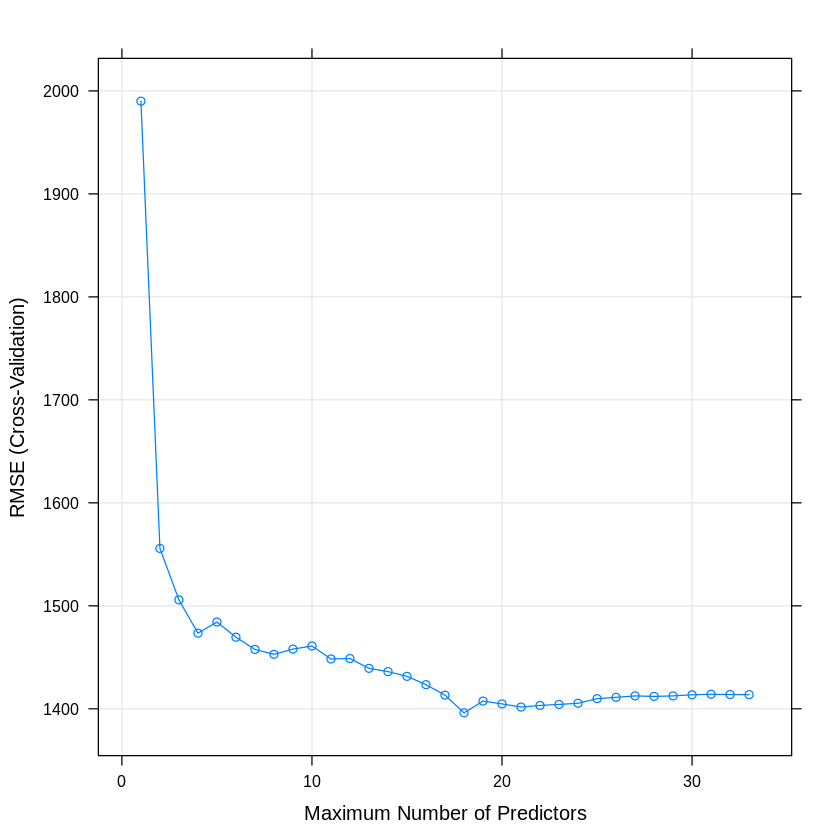

In [ ]:
plot(fit.stepwise)

In [ ]:
#fit.stepwise$bestTune[[1]]
as.data.frame(coef(fit.stepwise$finalModel,fit.stepwise$bestTune[[1]]))

,"coef(fit.stepwise$finalModel, fit.stepwise$bestTune[[1]])"
,<dbl>
(Intercept),-753.71670429
`Average salary - assistant professors`,44.70256092
`Average salary - all ranks`,-33.21714491
`Average compensation - assistant professors`,-36.91860868
`Average compensation - all ranks`,22.77856141
`Number of full professors`,15.18112362
`Number of associate professors`,8.20113068
`Number of assistant professors`,14.51288319
`Number of instructors`,12.76497445


In [ ]:
final_model <- lm(`In-state tuition` ~  `Average salary - assistant professors` + `Average salary - all ranks` +  
`Average compensation - assistant professors` + 
`Average compensation - all ranks` + `Number of full professors` + `Number of associate professors` + 
`Number of assistant professors` + `Number of instructors` + `Number of faculty - all ranks` + 
+ `Number of new students enrolled` + `Pct. new students from top 10% of H.S. class` +
`Number of fulltime undergraduates` + `Room and board costs` + `Board costs` + 
`Additional fees` + `Pct. of faculty with terminal degree`  + `Instructional expenditure per student` +
  `Graduation rate`  + `Out-of-state tuition`, data=train)

In [ ]:
summary(final_model)


Call:
lm(formula = `In-state tuition` ~ `Average salary - assistant professors` + 
    `Average salary - all ranks` + `Average compensation - assistant professors` + 
    `Average compensation - all ranks` + `Number of full professors` + 
    `Number of associate professors` + `Number of assistant professors` + 
    `Number of instructors` + `Number of faculty - all ranks` + 
    +`Number of new students enrolled` + `Pct. new students from top 10% of H.S. class` + 
    `Number of fulltime undergraduates` + `Room and board costs` + 
    `Board costs` + `Additional fees` + `Pct. of faculty with terminal degree` + 
    `Instructional expenditure per student` + `Graduation rate` + 
    `Out-of-state tuition`, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-6714.4  -612.7   192.6   767.2  5082.1 

Coefficients:
                                                 Estimate Std. Error t value
(Intercept)                                    -766.70343  457.00947  -1.678
`Averag

In [ ]:
predict <- predict(final_model, newdata = test) 

In [ ]:
actual_pred <- do.call(rbind, Map(data.frame,actual=test$`In-state tuition` ,predicted=predict)) 

In [ ]:
sprintf("The Train RMSE is: %f",sqrt(mean((train$`In-state tuition` - predict(final_model, train)) ^ 2)))

[1] "The Train RMSE is: 1340.314919"

In [ ]:
sprintf("The Test RMSE is: %f",sqrt(mean((test$`In-state tuition` - predict(final_model, test)) ^ 2)))

[1] "The Test RMSE is: 1500.578755"

In [ ]:
#install.packages("car")
#library(car)

In [ ]:
#vif_mod <- as.data.frame(car::vif(final_model))
#colnames(vif_mod) <- c("VIF")
#high_vif <- filter(vif_mod, (VIF < 10))
#high_vif
#vif_mod

**LASSO MODEL**

In [ ]:
#   Testing Other models ---- Dont delete this yet 
# Set the seed 
set.seed(10)
# Split dataframe to train and test 
train <- sample_frac(index, 0.75)
# Specify that instate tuition is our response variable 
train_y = train$`In-state tuition`
# train --  All the columns of the data except in state tuition 
train$`In-state tuition` <- NULL
train_x = train
# Specify the row indexes 
train_index <- as.numeric(rownames(train))  
# Remove the train rows from the dataset 
test <- index[-train_index, ]  
test_y <- test$`In-state tuition`
test$`In-state tuition`<- NULL
test_x <- test

In [ ]:
cv.fit.lasso <- cv.glmnet(as.matrix(train_x), as.matrix(train_y), alpha=1)

In [ ]:
coef(cv.fit.lasso, s=cv.fit.lasso$lambda.min)

34 x 1 sparse Matrix of class "dgCMatrix"
                                                         1
(Intercept)                                  -3.018597e+02
Average salary - full professors              .           
Average salary - associate professors         .           
Average salary - assistant professors         .           
Average salary - all ranks                    .           
Average compensation - full professors        .           
Average compensation - associate professors  -1.062142e-01
Average compensation - assistant professors  -5.965722e+00
Average compensation - all ranks             -7.769016e-04
Number of full professors                     .           
Number of associate professors               -5.874483e-01
Number of assistant professors                .           
Number of instructors                         .           
Number of faculty - all ranks                 .           
Number of applications received               .           
Number of appl

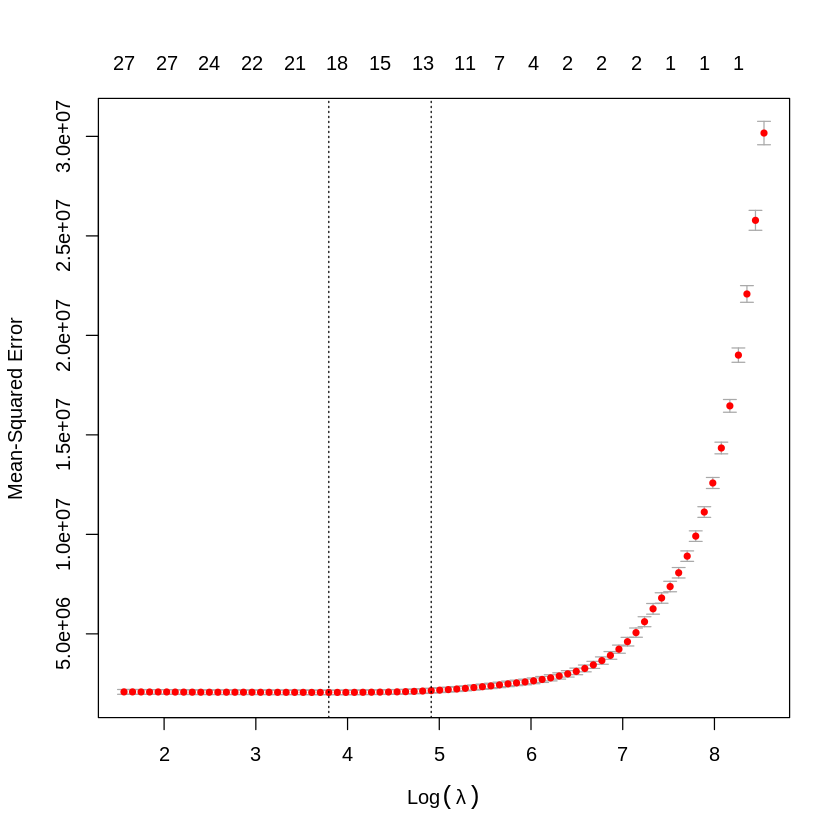

In [ ]:
plot(cv.fit.lasso)

In [ ]:
cv.fit.lasso$lambda.min

[1] 44.50242

In [ ]:
fit.lasso <- glmnet(as.matrix(train_x), as.matrix(train_y), lambda = cv.fit.lasso$lambda.min, alpha=1)

# Test Error of the lasso model 
preds.lasso <- predict(fit.lasso, as.matrix(test_x), s= cv.fit.lasso$lambda.min)

# Train Error of the lasso model 
train_laso <- predict(fit.lasso, as.matrix(train_x), s= cv.fit.lasso$lambda.min)

In [ ]:
sprintf("This is the train RMSE : %f",  sqrt(mean((train_laso-as.matrix(train_y))^2)))

[1] "This is the train RMSE : 1385.903099"

In [ ]:
sprintf("This is the test RMSE : %f", sqrt(mean((preds.lasso-as.matrix(test_y))^2)))

[1] "This is the test RMSE : 1539.068641"

In [ ]:
summary(cv.fit.lasso)

           Length Class  Mode     
lambda     76     -none- numeric  
cvm        76     -none- numeric  
cvsd       76     -none- numeric  
cvup       76     -none- numeric  
cvlo       76     -none- numeric  
nzero      76     -none- numeric  
call        4     -none- call     
name        1     -none- character
glmnet.fit 12     elnet  list     
lambda.min  1     -none- numeric  
lambda.1se  1     -none- numeric  
index       2     -none- numeric  

In [ ]:
# Compute R^2 from true and predicted values
eval_results <- function(true, predicted, df) {
  SSE <- sum((predicted - true)^2)
  SST <- sum((true - mean(true))^2)
  R_square <- 1 - SSE / SST
  RMSE = sqrt(SSE/nrow(df))

  
  # Model performance metrics
return(data.frame(
  RMSE = RMSE,
  Rsquare = R_square
))
  
}
df <- eval_results(as.matrix(test_y), preds.lasso, test)
df

RMSE,Rsquare
<dbl>,<dbl>
1539.069,0.9130731


# **RandomForest** 

In [ ]:
testdata <- index
colnames(testdata)<- c('V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20',
                        'V21','V22','V23','V24','V25','V26','V27','V28','V29','V30','V31','V32','V33','V34')

In [ ]:
index2 = testdata[,1:34]
# Set the seed 
set.seed(10)
# Split dataframe to train and test 
train2 <- sample_frac(index2, 0.75)
# Specify the row indexes 
train_index2 <- as.numeric(rownames(train2))  
# Remove the train rows from the dataset 
test2 <- index2[-train_index2, ]  

In [ ]:
set.seed(1)
rf_model <- randomForest(`V21` ~., data = train2, ntree = 550, importance = TRUE)

In [ ]:
print(rf_model)


Call:
 randomForest(formula = V21 ~ ., data = train2, ntree = 550, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 550
No. of variables tried at each split: 11

          Mean of squared residuals: 1417448
                    % Var explained: 95.3


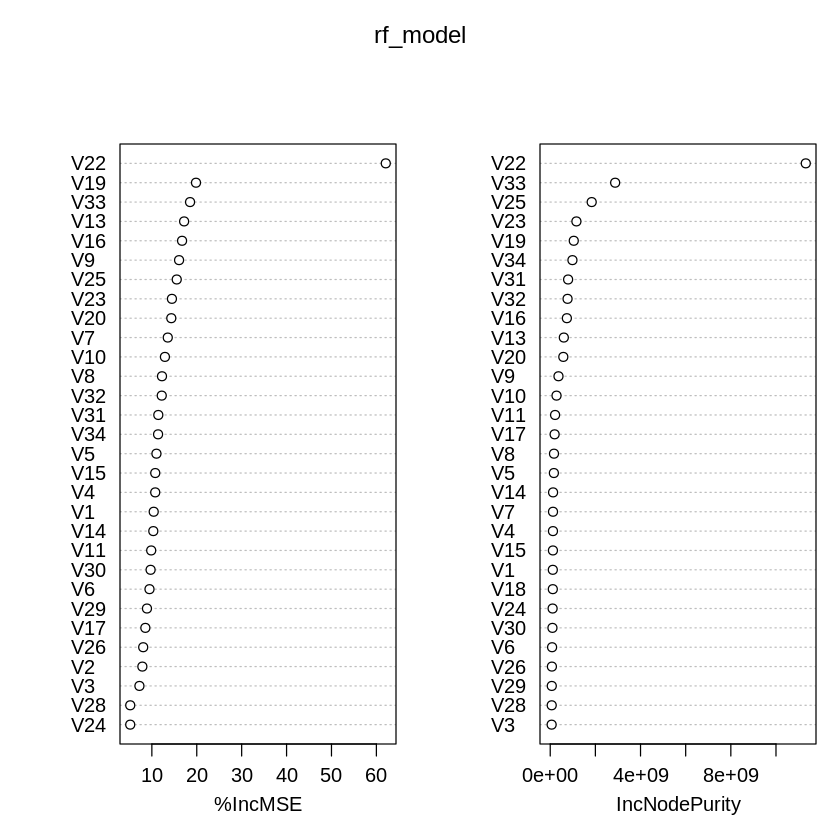

In [ ]:
varImpPlot(rf_model)

In [ ]:
try <- testdata %>% dplyr::select('V21','V32','V20','V13','V16','V31','V23','V19','V25','V33','V17','V10','V22')
set.seed(10)
# Split dataframe to train and test 
train4 <- sample_frac(try, 0.7)
# Specify the row indexes 
train_index4 <- as.numeric(rownames(train4)) 
# Remove the train rows from the dataset 
test4 <- try[-train_index4, ]  
try_model <- randomForest(`V21` ~., data = train4, ntree = 550, importance = TRUE, mtry=5)
prediction_rf4 <- predict(try_model, test4)
train_rf4 <- predict(try_model, train4)

In [ ]:
oob.err<-double(12)
test.err<-double(12)

#mtry is no of Variables randomly chosen at each split
for(mtry in 1:12) 
{
  rf=randomForest(V21 ~ . , data = train4 ,mtry=mtry,ntree=400) 
  oob.err[mtry] = rf$mse[400] #Error of all Trees fitted
  
  pred<-predict(rf,test4) #Predictions on Test Set for each Tree
  test.err[mtry]= with(test4, mean( (V21 - pred)^2)) #Mean Squared Test Error
  
  cat(mtry," ")
  
}

1  2  3  4  5  6  7  8  9  10  11  12  

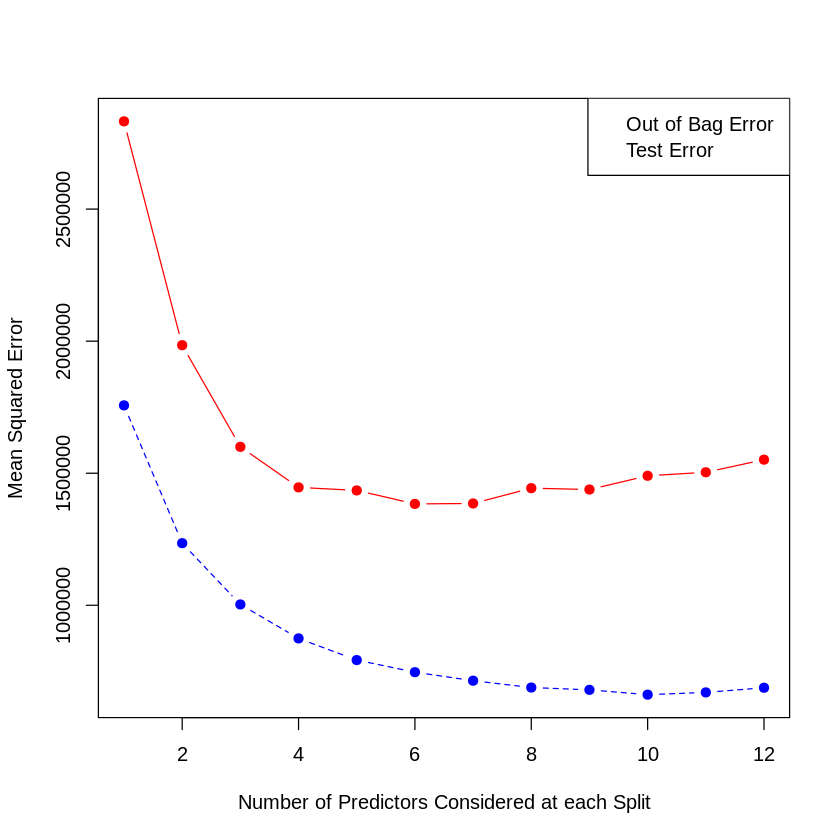

In [ ]:
matplot(1:mtry , cbind(oob.err,test.err) , col=c("red","blue"),pch=19,type="b",ylab="Mean Squared Error",xlab="Number of Predictors Considered at each Split")
legend("topright",legend=c("Out of Bag Error","Test Error"), col=c("red","blue"))

In [ ]:
rf_model <- randomForest(`V21` ~., data = train4, ntree = 550, importance = TRUE, mtry = 8)
prediction_rf4 <- predict(rf_model, test4)
train_rf4 <- predict(rf_model, train4)
sprintf("This is the train RMSE : %f",  sqrt(mean((train4$V21-train_rf4)^2)))
sprintf("This is the test RMSE : %f", sqrt(mean((test4$V21-prediction_rf4)^2)))

[1] "This is the train RMSE : 499.017470"

[1] "This is the test RMSE : 845.146249"

**Support Vector Machine : Regression**

In [77]:
#   Testing Other models ---- Dont delete this yet 
# Set the seed 
set.seed(10)
# Split dataframe to train and test 
train <- sample_frac(index, 0.75)
# Specify that instate tuition is our response variable 
# Specify the row indexes 
train_index <- as.numeric(rownames(train))  
# Remove the train rows from the dataset 
test <- index[-train_index, ]  


In [78]:
modelsvm = svm(`In-state tuition`~., data=train)
print(modelsvm)


Call:
svm(formula = `In-state tuition` ~ ., data = train)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.03030303 
    epsilon:  0.1 


Number of Support Vectors:  460



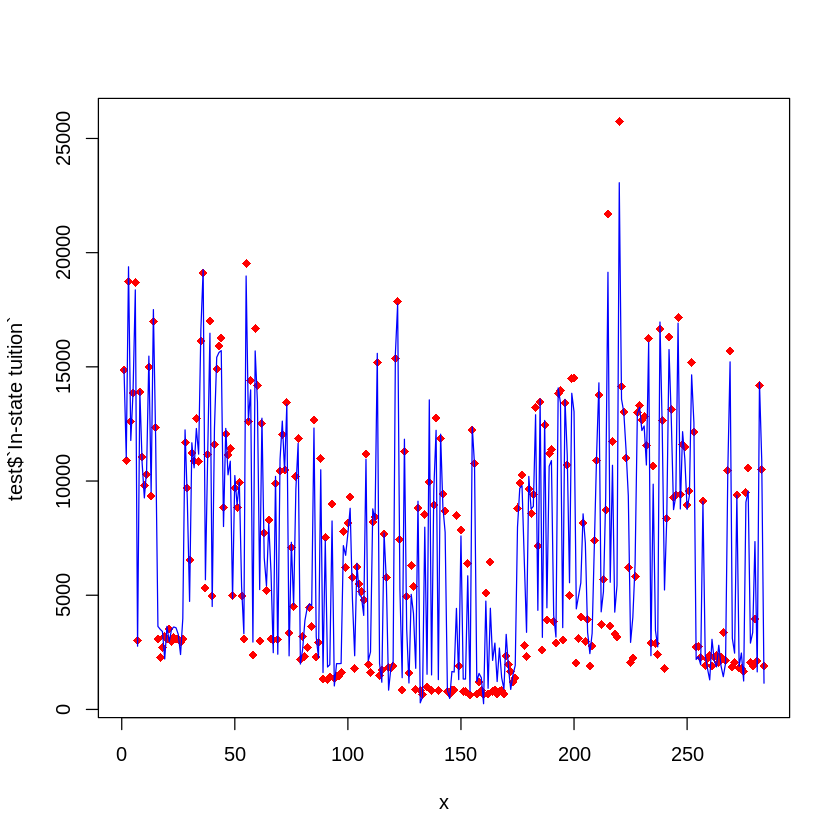

In [79]:
svmtest = predict(modelsvm, test)
svmtrain = predict(modelsvm,train)
 
x=1:length(test$`In-state tuition`)
plot(x, test$`In-state tuition`, pch=18, col="red")
lines(x, svmtest, lwd="1", col="blue")

In [80]:
svm_evaluation <- eval_results(as.matrix(test$`In-state tuition`), svmtest, test)
svm_evaluation

RMSE,Rsquare
<dbl>,<dbl>
964.5812,0.9658559
